In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(132)

#Датасет с нормальными комментариями

Скачиваем датасет с номальными комментариями.


In [ ]:
with open('drive/MyDrive/Diplom/my_clean_data_normies.csv') as f:
    my_data_normies = pd.read_csv(f, sep=',')

In [ ]:
my_data_normies

,no_follow,link_id,author,author_verified,author_comment_karma,author_link_karma,created_utc,over_18,body,is_submitter,...,recent_percent_neg_score,recent_avg_score,recent_min_score,recent_avg_controversiality,recent_avg_ups,recent_avg_diff_ratio,recent_max_diff_ratio,recent_avg_sentiment_polarity,recent_min_sentiment_polarity,target
0,False,t3_2l5szg,ADHDbot,False,-6.0,1.0,2014-11-03 15:02:38,False,"As per the rules in the side bar, yes or no qu...",False,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,normal
1,False,t3_2l61gs,ADHDbot,False,-6.0,1.0,2014-11-03 16:21:27,False,Meme and image posts are not allowed on this s...,False,...,0.0,1.000000,1.0,0.0,1.000000,0.025000,0.025000,0.133333,0.10,normal
2,False,t3_2l7ma8,ADHDbot,False,-6.0,1.0,2014-11-04 00:21:05,False,"As per the rules in the side bar, yes or no qu...",False,...,0.0,1.000000,1.0,0.0,1.000000,0.517500,1.000000,0.144444,0.10,normal
3,False,t3_2l7t5h,ADHDbot,False,-6.0,1.0,2014-11-04 01:23:18,False,"As per the rules in the side bar, yes or no qu...",False,...,0.0,1.000000,1.0,0.0,1.000000,0.678333,1.000000,0.150000,0.10,normal
4,False,t3_2l900k,ADHDbot,False,-6.0,1.0,2014-11-04 10:15:33,False,We cannot and will not diagnose anyone. You n...,False,...,0.0,1.000000,1.0,0.0,1.000000,0.035000,0.050000,0.130000,0.05,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181612,False,t3_3bf1c9,ddlbot,False,335.0,371.0,2015-06-29 05:03:52,False,"Happened to me once, took a wrong train that d...",False,...,0.0,2.888889,1.0,0.0,2.888889,0.131306,0.241245,0.076833,-0.50,normal
181613,False,t3_3eddmz,ddlbot,False,335.0,371.0,2015-07-23 23:59:22,False,Down Voted because if this idiot gets more sub...,False,...,0.0,2.700000,1.0,0.0,2.700000,0.193065,0.314465,0.078838,-0.25,normal
181614,False,t3_3h2ziz,ddlbot,False,335.0,371.0,2015-08-15 10:27:10,False,"He says he is Sumeran, and there would be 6000...",False,...,0.0,3.727273,1.0,0.0,3.727273,0.119523,0.227642,0.043102,-0.35,normal
181615,False,t3_3hcthq,ddlbot,False,335.0,371.0,2015-08-17 21:58:47,False,Pasha's barbers on stoke newington high street...,False,...,0.0,3.500000,1.0,0.0,3.500000,0.189966,0.581132,0.061068,-0.25,normal


Проверим датасет с нормальными комментариями, так как многие имена авторов содержат 'bot', что вызывает подозрения.

In [ ]:
import re

word = '[bB][oO][tT]'

def bot(author_name):
    #print(author_name)
    if pd.isna(author_name):
      #print(author_name)
      return 0
    if re.search(word, author_name) != None:
      return 1
    return 0


my_data_normies['bot_author'] = my_data_normies['author'].apply(bot)

In [ ]:
sum(my_data_normies['bot_author'])

120637

Получаем 120 637 строк, в которых имя автора похоже имя бота.

In [ ]:
my_data_normies = my_data_normies.drop(my_data_normies[my_data_normies.bot_author == 1].index)

Попробуем другой датасет для нормальных комментариев.

In [ ]:
normal_comments=pd.read_csv("drive/MyDrive/Diplom/csv-zusammenfuehren.de_3mjg6fs7.csv", 
                            usecols = ["link_id", "author", "score", "body", "ups"],
                            dtype={
                                "link_id": str,
                                "author": str,
                                "body": str,
                                }, 
                                on_bad_lines='warn')

In [ ]:
normal_comments = normal_comments.convert_dtypes()
normal_comments.dtypes

body       string
author     string
link_id    string
score      string
ups        string
dtype: object

In [ ]:
normal_comments

,body,author,link_id,score,ups
0,"I guess there was some awkwardness, but it was...",elevenghosts,t3_2urgi1,1,1
1,"Food schmooze isn't bad, I've gotten a few int...",BeerBaldBeard,t3_2wj4w8,1,1
2,Is there a fatigue animation before sleep that...,tmrxwoot,t3_2vvy1m,1,1
3,"I recently saw some Shohei Inamura films, spec...",Zassolluto711,t3_2x9q0x,2,2
4,How long did that take?,Ditto_B,t3_2w566b,2,2
...,...,...,...,...,...
45144,I remember the 2007 clippers. Which is the sa...,kcheng686,t3_5on47d,1,<NA>
45145,On second thought you might actually be autistic,DisconnectedCorn,t3_5q9ppf,1,<NA>
45146,"Hello darkness, my old friend, I've come to ta...",najing_ftw,t3_5pqb17,3,<NA>
45147,You can't use the enter key when you're doing ...,Fourteen_of_Twelve,t3_5oh8zt,5,<NA>


Посчитаем количество авторов содержащих паттерн "bot".

In [ ]:
normal_comments['bot_author'] = normal_comments['author'].apply(bot)
sum(normal_comments['bot_author'])

303

Таких авторов всего 303, значит этот датасет нам вероятно подходит больше. Удалим комментарии этих авторов.

In [ ]:
normal_comments = normal_comments.drop(normal_comments[normal_comments.bot_author == 1].index)

Добавим признаки is_bot is_troll is_normal.

In [ ]:
normal_comments.drop(['bot_author'], axis=1, inplace = True)
normal_comments['is_bot'] = False
normal_comments['is_troll'] = False
normal_comments['is_normal'] = True

Проверим все признаки на соответствие типу и удалим или заменим пустые значения.

In [ ]:
print('number of nuns in score column:' ,normal_comments.score.isna().sum())
print('number of nuns in link_id column:' ,normal_comments.link_id.isna().sum())

print('number of nuns in author column:' ,normal_comments.author.isna().sum())
print('number of nuns in body column:' ,normal_comments.body.isna().sum())

print('number of nuns in ups column:' ,normal_comments.ups.isna().sum())

number of nuns in score column: 13
number of nuns in link_id column: 13
number of nuns in author column: 16
number of nuns in body column: 0
number of nuns in ups column: 13499


Зополняем 'score','ups' нулями, а 'link_id','author' строкой 'unknown'.

In [ ]:
normal_comments[['score','ups']] = normal_comments[['score','ups']].fillna(value='0')
normal_comments[['link_id','author']] = normal_comments[['link_id','author']].fillna(value='unknown')

In [ ]:
def check_num(x):
  result = re.match("[-+]?\d+$", x)
  
  if result is not None:
    return 0
  else:
    return 1

In [ ]:
normal_comments['is_score_ok'] = normal_comments.score.apply(lambda x: check_num(x))
print('number of wrong-type values in score column', normal_comments['is_score_ok'].sum())

number of wrong-type values in score column 6


In [ ]:
normal_comments[normal_comments.is_score_ok == 1]

,body,author,link_id,score,ups,is_bot,is_troll,is_normal,is_score_ok
4579,However,false,1425957719,t3_2ygb9z,cp9w6yh,False,False,True,1
9682,"&gt; Sometimes, we need a moment to raise awar...",unknown,t5_2zc5x,t1_cwbjml0,Fireteams,False,False,True,1
11213,And I'm really,those negative people who contribute little o...,false,p_U_c_K_IV,t1_ctitrc4,False,False,True,1
33340,I thought Titan of Braavos was used by his fat...,unknown,t5_2r2o9,t1_d5apvwb,asoiaf,False,False,True,1
38618,You mean to tell me that not all white people ...,unknown,1489440218,t3_5z537w,devy9pm,False,False,True,1
40409,"Who let Chip be on Reddit again? [removed],,,,...",unknown,t5_2qh0u,t3_66v6i6,pics,False,False,True,1


Удалим строки, приведенные выше (в них перепутаны значения в столбцах).

In [ ]:
normal_comments = normal_comments.drop(normal_comments[normal_comments.is_score_ok == 1].index)

In [ ]:
normal_comments['is_ups_ok'] = normal_comments.score.apply(lambda x: check_num(x))
print('number of wrong values in ups column', normal_comments['is_ups_ok'].sum())

number of wrong values in ups column 0


In [ ]:
def check_link(x):
  result = re.match("t\d_\w+", x)
  
  if result is not None:
    return 0
  else:
    return 1

Проверим, все ли значения в link_id соответствуют шаблону t[0-9]_w+.

In [ ]:
normal_comments['link_id_ok'] = normal_comments.link_id.apply(lambda x: check_link(x))
print('number of wrong values in link_id column', normal_comments['link_id_ok'].sum())

number of wrong values in link_id column 13


In [ ]:
normal_comments[normal_comments.link_id_ok == 1]

,body,author,link_id,score,ups,is_bot,is_troll,is_normal,is_score_ok,is_ups_ok,link_id_ok
4575,He must have been raped by a pineapple. Did yo...,unknown,unknown,0,0,False,False,True,0,0,1
4576,Is a Boston kid going to San Diego or a Miami ...,unknown,unknown,0,0,False,False,True,0,0,1
4577,All three flights are basically between 6 and ...,unknown,unknown,0,0,False,False,True,0,0,1
4578,",false,false,t1_cpoi4gw,shinypenny01,Eagles,0,...",unknown,unknown,0,0,False,False,True,0,0,1
11207,I'm fucking heated right now... That was one o...,unknown,unknown,0,0,False,False,True,0,0,1
11208,Edit: Whomever is downvoting everything I post...,unknown,unknown,0,0,False,False,True,0,0,1
11209,Edit 2: As you will see at the bottom of this....,unknown,unknown,0,0,False,False,True,0,0,1
11210,it's happened before. And it's relatively clea...,unknown,unknown,0,0,False,False,True,0,0,1
11211,I have faith that my posts will be found in th...,in this never ending argument that new people...,unknown,0,0,False,False,True,0,0,1
18541,"xbox resolution? [deleted],,,,[deleted],,,145...",unknown,unknown,0,0,False,False,True,0,0,1


In [ ]:
normal_comments = normal_comments.drop(normal_comments[normal_comments.link_id_ok == 1].index)

In [ ]:
normal_comments.drop(['is_ups_ok'], axis=1, inplace = True)
normal_comments.drop(['is_score_ok'], axis=1, inplace = True)
normal_comments.drop(['link_id_ok'], axis=1, inplace = True)

In [ ]:
normal_comments.score = normal_comments.score.astype('int64')
normal_comments.ups = normal_comments.ups.astype('int64')

<Axes: >

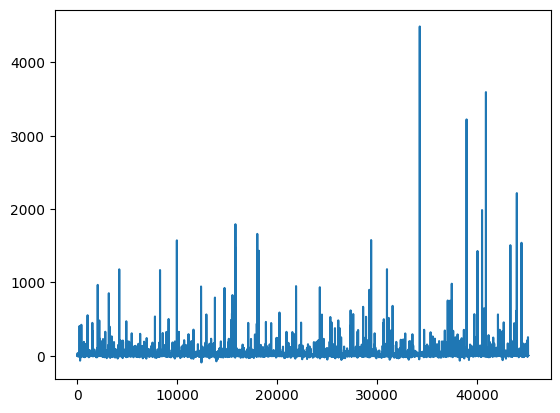

In [ ]:
normal_comments['score'].plot(kind='line')

<Axes: >

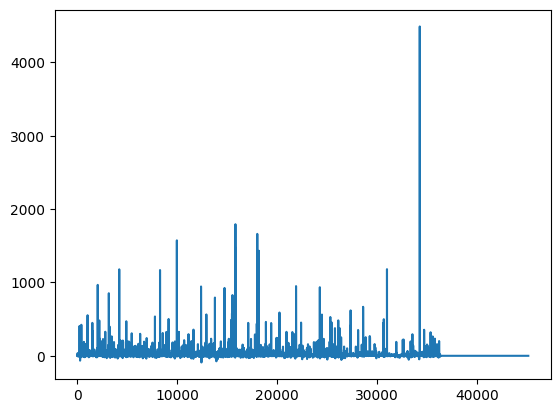

In [ ]:
normal_comments['ups'].plot(kind='line')

#Датасет с ботами и троллями

Теперь откроем датасет с ботами и тролями.

In [ ]:
with open('drive/MyDrive/Diplom/training-dump.csv') as f:
    my_data = pd.read_csv(f, sep=',',
                          usecols = ["link_id",  "author", "score", "body", "ups","is_bot","is_troll"],
                          dtype={"link_id": str,
                                 "author": str,
                                 "body": str,
                                 "is_bot": bool,
                                 "is_troll": bool})

In [ ]:
my_data['is_normal'] = False

In [ ]:
my_data

,link_id,author,score,body,ups,is_bot,is_troll,is_normal
0,t3_2l5szg,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
1,t3_2l61gs,ADHDbot,1,Meme and image posts are not allowed on this s...,1,True,False,False
2,t3_2l7ma8,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
3,t3_2l7t5h,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
4,t3_2l900k,ADHDbot,1,We cannot and will not diagnose anyone. You n...,1,True,False,False
...,...,...,...,...,...,...,...,...
267031,t3_96p3s7,haiku_robot,7,ಠ\_ಠ,7,True,False,False
267032,t3_1w5fy8,tipmoonbot2,2,+/u/tipmoonbot 48 moon TO THE MOON!,2,True,False,False
267033,t3_1w5fy8,tipmoonbot2,1,+/u/tipmoonbot 26 moon TO THE MOON!,1,True,False,False
267034,t3_1w6etv,tipmoonbot2,2,blah blah,2,True,False,False


In [ ]:
my_data = my_data.convert_dtypes()
my_data.dtypes

link_id       string
author        string
score          Int64
body          string
ups            Int64
is_bot       boolean
is_troll     boolean
is_normal    boolean
dtype: object

Посмотрим на пропущенные значения.

In [ ]:
print('number of nuns in score column:' ,my_data.score.isna().sum())
print('number of nuns in link_id column:' ,my_data.link_id.isna().sum())

print('number of nuns in author column:' ,my_data.author.isna().sum())
print('number of nuns in body column:' ,my_data.body.isna().sum())


print('number of nuns in ups column:' ,my_data.ups.isna().sum())

print('number of nuns in is_bot column:' ,my_data.is_bot.isna().sum())
print('number of nuns in is_troll column:' ,my_data.is_troll.isna().sum())

number of nuns in score column: 0
number of nuns in link_id column: 0
number of nuns in author column: 0
number of nuns in body column: 1
number of nuns in ups column: 0
number of nuns in is_bot column: 0
number of nuns in is_troll column: 0


In [ ]:
my_data.dropna(subset = ['body'], inplace = True)

In [ ]:
my_data.is_bot = my_data.is_bot.astype(bool)
my_data.is_troll = my_data.is_troll.astype(bool)
my_data.is_normal = my_data.is_normal.astype(bool)

In [ ]:
my_data.dtypes

link_id      string
author       string
score         Int64
body         string
ups           Int64
is_bot         bool
is_troll       bool
is_normal      bool
dtype: object

<Axes: >

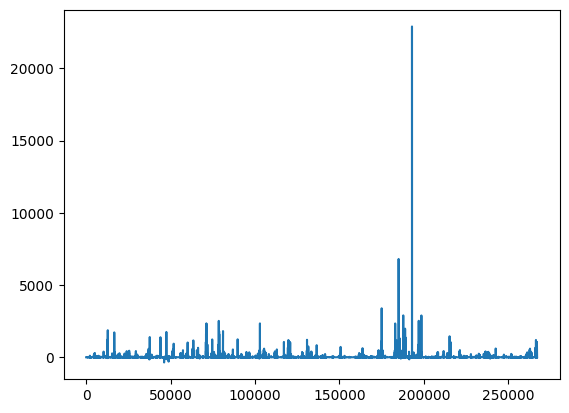

In [ ]:
my_data['score'].plot(kind='line')

<Axes: >

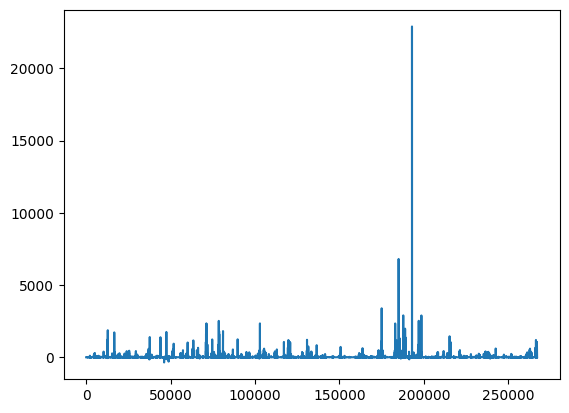

In [ ]:
my_data['ups'].plot(kind='line')

Посмотрим на это крайнее значение.

In [ ]:
my_data[my_data.score > 10000]

,link_id,author,score,body,ups,is_bot,is_troll,is_normal
192972,t3_7ja1xx,BerskyN,22893,You may never know if you've gone insane.,22893,False,True,False
192973,t3_7ja1xx,BerskyN,11927,If you become an astronaut and are in the ISS ...,11927,False,True,False
192974,t3_7ja1xx,BerskyN,14938,There are a huge amount of illnesses that aren...,14938,False,True,False
192975,t3_7ja1xx,BerskyN,22030,The first firefighter killed responding to the...,22030,False,True,False
192976,t3_7ja1xx,BerskyN,14104,Every picture you pose for could be the one us...,14104,False,True,False


#Объединенный датасет

Соединяем два датасета

In [ ]:
full_data = pd.concat([my_data, normal_comments], ignore_index=True)

In [ ]:
full_data.dtypes

link_id      object
author       object
score         Int64
body         object
ups           Int64
is_bot         bool
is_troll       bool
is_normal      bool
dtype: object

Удалим повторяющиеся строки.

In [ ]:
full_data.drop_duplicates(inplace=True)

Проверим датасет на пустые значения.

In [ ]:
print('number of nuns in score column:' ,full_data.score.isna().sum())
print('number of nuns in link_id column:' ,full_data.link_id.isna().sum())

print('number of nuns in author column:' ,full_data.author.isna().sum())
print('number of nuns in body column:' ,full_data.body.isna().sum())


print('number of nuns in ups column:' ,full_data.ups.isna().sum())

print('number of nuns in is_bot column:' ,full_data.is_bot.isna().sum())
print('number of nuns in is_troll column:' ,full_data.is_troll.isna().sum())

number of nuns in score column: 0
number of nuns in link_id column: 0
number of nuns in author column: 0
number of nuns in body column: 0
number of nuns in ups column: 0
number of nuns in is_bot column: 0
number of nuns in is_troll column: 0


In [ ]:
full_data

,Unnamed: 0,link_id,author,score,body,ups,Y
0,0,t3_2l5szg,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,0
1,1,t3_2l61gs,ADHDbot,1,Meme and image posts are not allowed on this s...,1,0
2,2,t3_2l7ma8,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,0
3,3,t3_2l7t5h,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,0
4,4,t3_2l900k,ADHDbot,1,We cannot and will not diagnose anyone. You ne...,1,0
...,...,...,...,...,...,...,...
228607,311857,t3_5on47d,kcheng686,1,I remember the 2007 clippers. Which is the sam...,0,2
228608,311858,t3_5q9ppf,DisconnectedCorn,1,On second thought you might actually be autistic,0,2
228609,311859,t3_5pqb17,najing_ftw,3,"Hello darkness, my old friend, I've come to ta...",0,2
228610,311860,t3_5oh8zt,Fourteen_of_Twelve,5,You can't use the enter key when you're doing ...,0,2


In [ ]:
# Count num of bots and trolls
bots = full_data['is_bot']
trolls = full_data['is_troll']
normals = full_data['is_normal']

print("Number of bot comments: ", bots.sum())
print("Number of troll comments:", trolls.sum())
print("Number of normal comments:", normals.sum())

bot_authors = full_data[full_data['is_bot'] == True][['author']]
troll_authors = full_data[full_data['is_troll'] == True][['author']]
normal_authors = full_data[full_data['is_normal'] == True][['author']]

print("Number of bot authors: ", len(np.unique(bot_authors)))
print("Number of troll authors:", len(np.unique(troll_authors)))
print("Number of normal authors:", len(np.unique(normal_authors)))

Number of bot comments:  177238
Number of troll comments: 6552
Number of normal comments: 44822
Number of bot authors:  343
Number of troll authors: 153
Number of normal authors: 39665


Выделим целевую переменную в отдельный столбец.

In [ ]:
full_data['is_troll'] = np.where(full_data['is_troll'] == True, 1,0)
full_data['is_normal'] = np.where(full_data['is_normal'] == True, 2,0)

In [ ]:
full_data['Y'] = full_data['is_troll']+full_data['is_normal']
full_data.drop(columns = ['is_troll', 'is_normal', 'is_bot'], inplace = True)

In [ ]:
full_data['Y'].value_counts()

0    177238
2     44822
1      6552
Name: Y, dtype: int64

Теперь 0 - бот, 1 - тролль, 2 - нормальный комментарий.

Удалим все табуялции.

In [ ]:
def delt(x):
    return re.sub(r"\s+", " ", x)


full_data['author'] = full_data['author'].apply(lambda x: delt(x))
full_data['link_id'] = full_data['link_id'].apply(lambda x: delt(x))
full_data['body'] = full_data['body'].apply(lambda x: delt(x))

In [ ]:
from sklearn.utils import shuffle

In [ ]:
full_data = shuffle(full_data)

In [ ]:
full_data['body_length'] = full_data['body'].apply(lambda x: len(x))

In [8]:
col = ['ups','score','body_length','body']
cols = ['ups','score','body_length','body','Y']

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_data[cols], test_size = 0.3, random_state = 32)

Боремся с выбросами на тренировочной выборке.

In [11]:
q_low = train['body_length'].quantile(0.05)
q_hi  = train['body_length'].quantile(0.95)

train = train[(train["body_length"] < q_hi) & (train["body_length"] > q_low)]

In [ ]:
full_data.to_csv('drive/MyDrive/Diplom/full_data.csv', sep='\t')

In [12]:
train.to_csv('drive/MyDrive/Diplom/train.csv', sep='\t')
test.to_csv('drive/MyDrive/Diplom/test.csv', sep='\t')

# Логистическая регрессия

In [ ]:
with open('drive/MyDrive/Diplom/train.csv') as f:
    train = pd.read_csv(f,sep='\t')
with open('drive/MyDrive/Diplom/test.csv') as f:
    test = pd.read_csv(f,sep='\t')

In [13]:
col = ['ups','score','body_length']
cols = ['ups','score','body_length','Y']

In [14]:
X_train = train[col]
y_train = train['Y'].values

X_test = test[col]
y_test = test['Y'].values

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def metrics(y_test, y_pred, y_pred_proba):
  
  conf = confusion_matrix(y_test, y_pred)
  print(conf)
  f1_ma = round(f1_score(y_test, y_pred, average='macro'), 4)
  f1_mi = round(f1_score(y_test, y_pred, average='micro'), 4)
  f1_we = round(f1_score(y_test, y_pred, average='weighted'), 4)
  b_acc = round(balanced_accuracy_score(y_test, y_pred), 4)
  neg_ll = round(- log_loss(y_test, y_pred_proba), 4)
  roc_auc_ovr = round(roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class = 'ovr'), 4)
  roc_auc_ovo = round(roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class = 'ovo'), 4)

  print('f1_score_macro:', f1_ma)
  print('f1_score_micro:', f1_mi)
  print('f1_score_weighted:', f1_we)
  print('balanced_accuracy_score:', b_acc)
  print('neg_log_loss:', neg_ll)
  print('roc_auc_score ovr:', roc_auc_ovr)
  print('roc_auc_score ovo:', roc_auc_ovo)

  return pd.DataFrame({'features': ['ups,score,body_length'],'f1_score_macro': [f1_ma], 'f1_score_micro': [f1_mi],'f1_score_weighted': [f1_we], 'balanced_accuracy_score': [b_acc], 'neg_log_loss': [neg_ll],'roc_auc_score ovr': [roc_auc_ovr], 'roc_auc_score ovo': [roc_auc_ovo]})


In [22]:
pipel = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, class_weight = 'balanced'))

pipel.fit(X_train, y_train)

y_pred = pipel.predict(X_test)
y_pred_proba = pipel.predict_proba(X_test)

res = metrics(y_test, y_pred, y_pred_proba)

[[38993 14167     0]
 [  393  1599     0]
 [ 3992  6516  2924]]
f1_score_macro: 0.4324
f1_score_micro: 0.6345
f1_score_weighted: 0.7
balanced_accuracy_score: 0.5846
neg_log_loss: -1.015
roc_auc_score ovr: 0.741
roc_auc_score ovo: 0.754


In [24]:
res.to_csv('drive/MyDrive/Diplom/results.csv')